# 第6章 常微分方程数值解

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### 例子1：解ODE问题 $y'(x) = - 2 y(x)$

可以用来描述物质的衰变

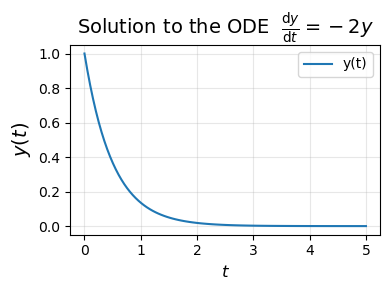

In [2]:
# Define the ODE as a function
def ode_function(t, y):
    return -2 * y

# Initial condition
y0 = [1]
# Time span for the solution
t_span = (0, 5)
# Points at which to evaluate the solution
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the ODE
solution = solve_ivp(ode_function, t_span, y0, t_eval=t_eval)

# Plot the results
plt.figure(figsize=(4, 3))
plt.plot(solution.t, solution.y[0], label='y(t)')
plt.title(r'Solution to the ODE  $\frac{\mathsf{d} y}{\mathsf{d} t} = -2y$',
        fontsize=14)
plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'$y(t)$', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 例子2：二体运动问题

In [3]:
# Model the two-body problem as the following ODE
def ode_function_two_body(t, y, G=1, m1=1, m2=1):
    """
    Two-body problem ODE system.
    
    Parameters:
    -----------
    t : float
        Time variable
    y : array_like
        State vector [r1, r2, v1, v2]
        where r1, r2 are positions and v1, v2 are velocities
    G : float
        Gravitational constant
    m1, m2 : float
        Masses of the two bodies
    
    Returns:
    --------
    vec : numpy.ndarray
        Derivative of the state vector
    """
    r1 = y[0:3]
    r2 = y[3:6]
    v1 = y[6:9]
    v2 = y[9:12]
    
    vec = np.zeros(12)
    vec[0:3] = v1
    vec[3:6] = v2
    
    distance_cubed = np.linalg.norm(r1 - r2)**3
    vec[6:9] = G * m2 / distance_cubed * (r2 - r1)
    vec[9:12] = G * m1 / distance_cubed * (r1 - r2)
    
    return vec


In [4]:
# Parameters for two-body problem
G = 4.1
m1 = 1
m2 = 1

# Initial conditions
c = 1
r1 = [1, 0, 0]
r2 = [-1, 0, 0]
v1 = [0, c, c]
v2 = [0, -c, -c]

y0 = np.hstack((r1, r2, v1, v2))

# Time span and evaluation points
T = 5000
t_span = (0, T)
t_eval = np.linspace(t_span[0], t_span[1], T * 200)  

# Solve the ODE
solution = solve_ivp(
    lambda t, y: ode_function_two_body(t, y, G=G, m1=m1, m2=m2),
    t_span, y0, t_eval=t_eval
)


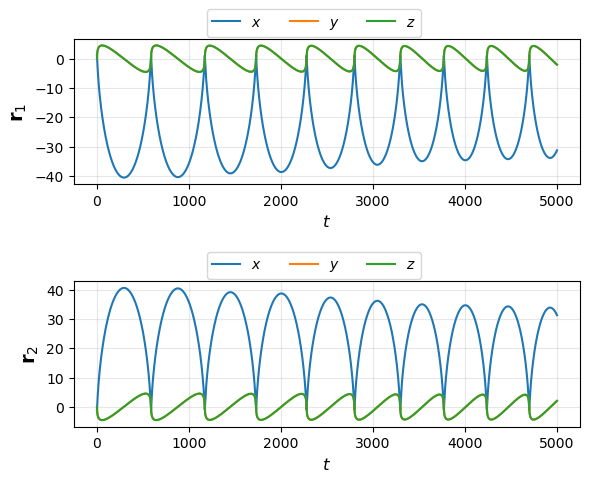

In [5]:
# Plot positions over time
fig1 = plt.figure(figsize=(6, 5))
plt.subplot(2, 1, 1)
plt.plot(solution.t, solution.y[0], label=r'$x$')
plt.plot(solution.t, solution.y[1], label=r'$y$')
plt.plot(solution.t, solution.y[2], label=r'$z$')
plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'${\bf r}_1$', fontsize=14)
plt.legend(bbox_to_anchor=(0.7, 1.25), ncol=3)
plt.grid(alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(solution.t, solution.y[3], label=r'$x$')
plt.plot(solution.t, solution.y[4], label=r'$y$')
plt.plot(solution.t, solution.y[5], label=r'$z$')
plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'${\bf r}_2$', fontsize=14)
plt.legend(bbox_to_anchor=(0.7, 1.25), ncol=3)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

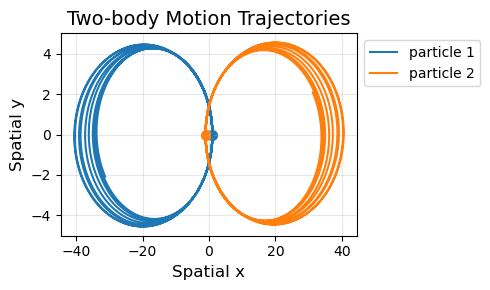

In [6]:
# Plot trajectories in 2D space
fig2 = plt.figure(figsize=(5, 3))
plt.plot(solution.y[0], solution.y[1], label="particle 1")
plt.scatter(y0[0], y0[1], s=50)
plt.plot(solution.y[3], solution.y[4], label="particle 2")
plt.scatter(y0[3], y0[4], s=50)
plt.xlabel('Spatial x', fontsize=12)
plt.ylabel('Spatial y', fontsize=12)
plt.title('Two-body Motion Trajectories', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 代码实现，以及检验计算的误差

In [7]:
def f(t, y):
    """ODE function: y' = sin(pi t) - 2y"""
    return np.sin(np.pi * t) - 2 * y


In [8]:
def solve_euler(n, f, y0, T):
    """
    Solve ODE using Euler's method.
    
    Parameters:
    -----------
    n : int
        Number of steps
    f : callable
        ODE function f(t, y)
    y0 : array_like
        Initial condition
    T : float
        Final time
    
    Returns:
    --------
    euler_value : numpy.ndarray
        Solution at time T
    """
    h = T / n
    euler_value = np.copy(y0)
    for i in range(1, n + 1):
        euler_value = euler_value + h * f(h * (i - 1), euler_value)
    
    return euler_value


def solve_improved_euler(n, f, y0, T):
    """
    Solve ODE using improved Euler's method (Heun's method).
    
    Parameters:
    -----------
    n : int
        Number of steps
    f : callable
        ODE function f(t, y)
    y0 : array_like
        Initial condition
    T : float
        Final time
    
    Returns:
    --------
    yk : numpy.ndarray
        Solution at time T
    """
    h = T / n    
    yk = np.copy(y0)
    for i in range(1, n + 1):
        ybar = yk + h * f((i - 1) * h, yk)
        yk = yk + h / 2 * (f((i - 1) * h, yk) + f(i * h, ybar))
    
    return yk


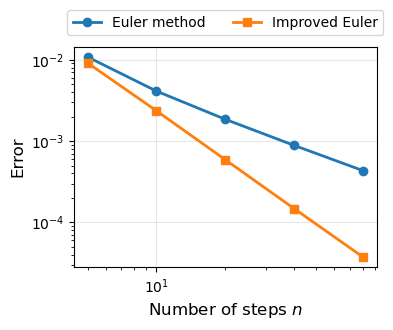

In [9]:
# Parameters for error analysis
T = 1.0
y0 = np.array([1.0])

# Compute reference solution with high accuracy
ref_solution = solve_ivp(
    lambda t, y: f(t, y), 
    (0, T), 
    y0, 
    method="DOP853",
    t_eval=np.linspace(0, T, int(np.round(T * 10000))),
    atol=1e-6
)

# Test different step sizes
n_list = np.array([5, 10, 20, 40, 80])
euler_err = np.zeros(len(n_list))
improved_euler_err = np.zeros(len(n_list))

for j in range(len(n_list)):
    n = n_list[j]
    euler_result = solve_euler(n, f, np.copy(y0), T)
    improved_euler_result = solve_improved_euler(n, f, np.copy(y0), T)
    
    euler_err[j] = np.linalg.norm(euler_result - ref_solution.y[:, -1])
    improved_euler_err[j] = np.linalg.norm(improved_euler_result - ref_solution.y[:, -1])

# Plot error comparison
plt.figure(figsize=(4, 3.5))
plt.plot(n_list, euler_err, 'o-', label='Euler method', linewidth=2)
plt.plot(n_list, improved_euler_err, 's-', label='Improved Euler', linewidth=2)
plt.legend(fontsize=10, loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.xlabel('Number of steps $n$', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

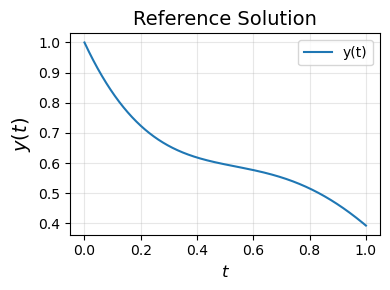

In [10]:
plt.figure(figsize = (4, 3))
plt.plot(ref_solution.t, ref_solution.y[0], label='y(t)')
plt.title('Reference Solution', fontsize=14)
plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'$y(t)$', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()